In [90]:
from numpy import *
from numpy.fft import fft, fftshift
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import csv
import sys

data_dir = ".\\nv_data" # the directory where your data is
sys.path.append(data_dir)

# NV I found
coords x = 102.45, y = 95.6, z = 80
this one might show fringes. 2023.07.23

## Electron spin resonance
find the magnet angle which maximizes the ms=-1,+1 Zeeman splitting

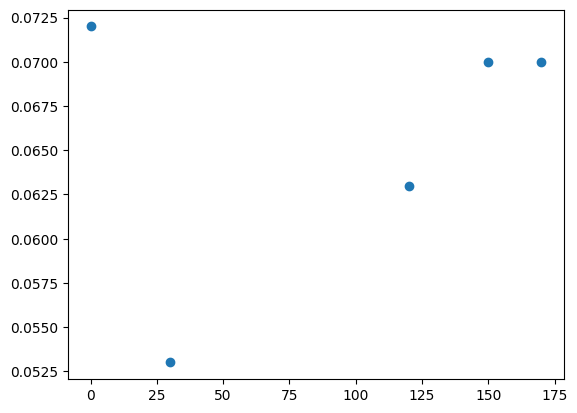

In [106]:
angles_degs = array([0,30,
                     #60,90,
                     120,150,170])
splittings_GHz = array([2.904-2.832,2.899-2.846,
                        #0,0,
                        2.901-2.838,2.902-2.832,2.903-2.833])
plt.scatter(angles_degs,splittings_GHz)

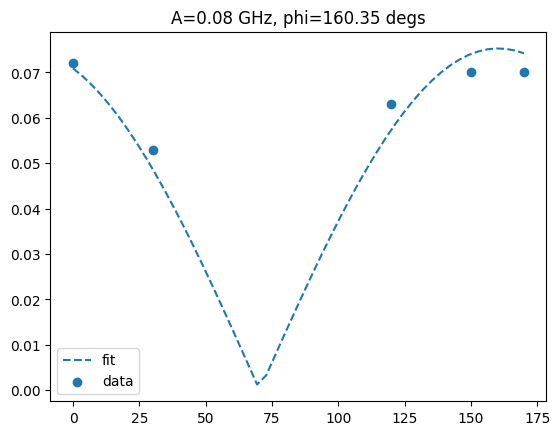

In [107]:
splitting_model = lambda theta_deg, A, phi_deg: A*abs(cos((theta_deg-phi_deg)*pi/180))
A_guess = 0.08
phi_deg_guess = 150
popt, pcov = curve_fit(splitting_model,angles_degs,splittings_GHz,p0=[A_guess,phi_deg_guess])

A,phi_deg = popt

fig,ax = plt.subplots()
angles_deg_pts = linspace(0,170,50)
ax.plot(angles_deg_pts,splitting_model(angles_deg_pts,*popt),linestyle='--',label='fit')
ax.scatter(angles_degs,splittings_GHz,label='data')
plt.legend()
ax.set_title(f"A={A:.2f} GHz, phi={phi_deg:.2f} degs")
plt.show()

## Ramsey
take a Fourier transform of the Ramsey fringe to get the frequency components (energy level shifts)

In [95]:
# at 25 mW of microwave power and f = 2.831 GHz, 
t_pi = int(95.6/2+0.5) # units ns, because freq. is in GHz

data_dir = ".\\nv_data\\2023.07.23"

files = ['Ramsey_no_fringe.csv']#,'Ramsey_with_5MHz_detuning-fit.csv']
t_data = [] # gap times in ns
y_data = [] # normalized fluorescence

for file in files:
    t_col = []
    y_col = []
    with open(os.path.join(data_dir,file)) as f:
        reader = csv.reader(f, delimiter=',')
        header = reader.__next__()
        for row in reader:
            t_col.append(float(row[0]))
            y_col.append(float(row[1]))
    t_data.append(t_col)
    y_data.append(y_col)

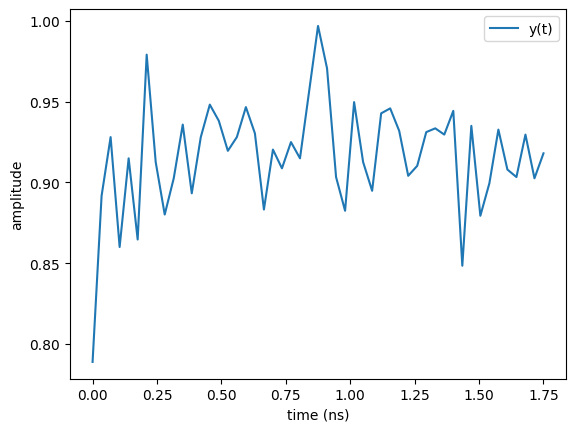

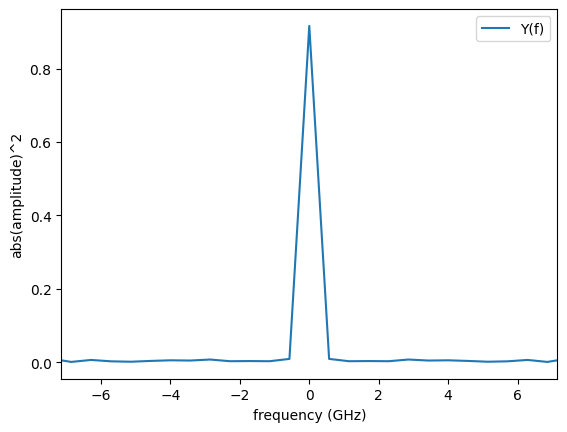

In [96]:
# take the FFT of our Ramsey curve
# bad data - no fringe

t_pts = t_data[0]
pts = len(t_pts)
y_pts = y_data[0]
Y_pts = fftshift(fft(y_pts))
dt = t_pts[1]-t_pts[0]
f_pts = linspace(-1/(2*dt),1/(2*dt),pts)

plt.plot(t_pts,y_pts,label='y(t)')
plt.legend()
plt.xlabel("time (ns)")
plt.ylabel("amplitude")
plt.show()

plt.plot(f_pts,abs(Y_pts)/pts,label='Y(f)')
plt.xlim((-max(f_pts)/2,max(f_pts)/2))
plt.legend()
plt.xlabel("frequency (GHz)")
plt.ylabel("abs(amplitude)^2")
plt.show()

# the default NV
this one doesn't show fringes. 2023.07.23

## Electron spin resonance
find the magnet angle which maximizes the ms=-1,+1 Zeeman splitting

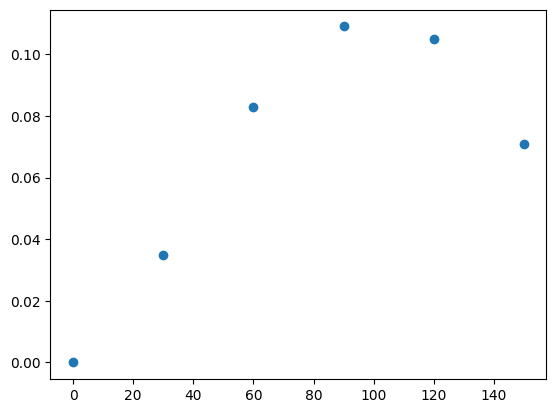

In [91]:
angles_degs = array([0,30,60,90,120,150])
splittings_GHz = array([0,2.89-2.855,2.913-2.830,2.925-2.816,2.924-2.819,
                 2.905-2.834])
plt.scatter(angles_degs,splittings_GHz)

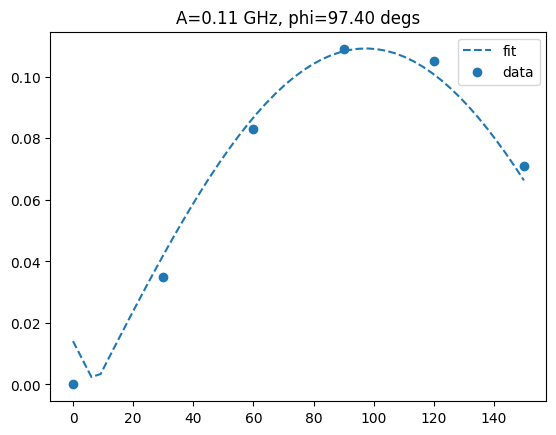

In [93]:
splitting_model = lambda theta_deg, A, phi_deg: A*abs(cos((theta_deg-phi_deg)*pi/180))
A_guess = 0.11
phi_deg_guess = 90
popt, pcov = curve_fit(splitting_model,angles_degs,splittings_GHz,p0=[A_guess,phi_deg_guess])

A,phi_deg = popt

fig,ax = plt.subplots()
angles_deg_pts = linspace(0,150,50)
ax.plot(angles_deg_pts,splitting_model(angles_deg_pts,*popt),linestyle='--',label='fit')
ax.scatter(angles_degs,splittings_GHz,label='data')
plt.legend()
ax.set_title(f"A={A:.2f} GHz, phi={phi_deg:.2f} degs")
plt.show()

## Ramsey
take a Fourier transform of the Ramsey fringe to get the frequency components (energy level shifts)

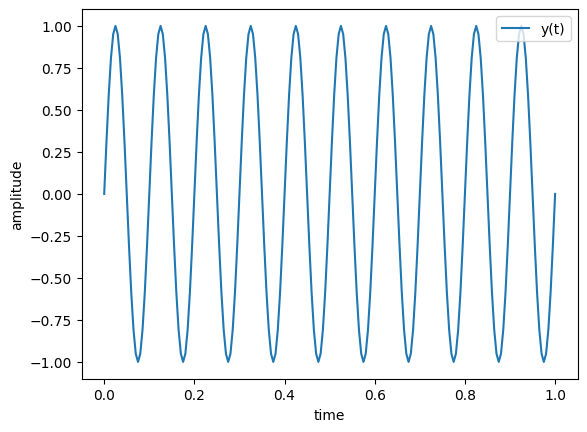

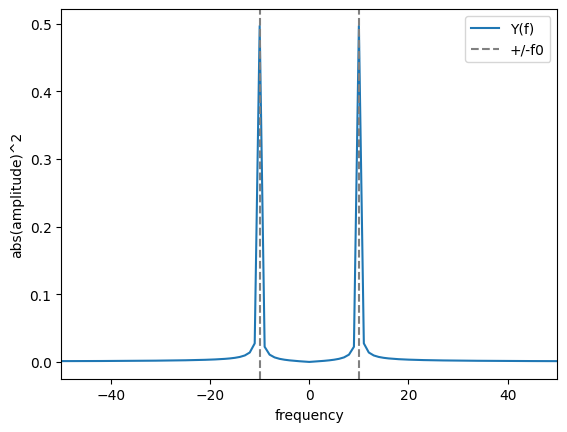

In [94]:
# example: how to take a fast Fourier transform of a sine wave

pts = 201
t_pts = linspace(0,1,pts) 
f0 = 10 # frequency, e.g. in Hz
y_pts = sin(2*pi*f0*t_pts) # sine wave with frequency f0
Y_pts = fftshift(fft(y_pts))
dt = t_pts[1]-t_pts[0]
f_pts = linspace(-1/(2*dt),1/(2*dt),pts)

plt.plot(t_pts,y_pts,label='y(t)')
plt.legend()
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

plt.plot(f_pts,abs(Y_pts)/pts,label='Y(f)')
plt.xlim((-max(f_pts)/2,max(f_pts)/2))
plt.axvline(-f0,linestyle='--',color='grey',label="+/-f0")
plt.axvline(f0,linestyle='--',color='grey')
plt.legend()
plt.xlabel("frequency")
plt.ylabel("abs(amplitude)^2")
plt.show()

In [95]:
# at 25 mW of microwave power and f = 2.819 GHz, 
t_pi = 86.6//2 # use units ns, because freq. is in GHz

data_dir = ".\\nv_data\\2023.07.23"

files = ['Ramsey_no_fringe.csv']#,'Ramsey_with_5MHz_detuning-fit.csv']
t_data = [] # gap times in ns
y_data = [] # normalized fluorescence

for file in files:
    t_col = []
    y_col = []
    with open(os.path.join(data_dir,file)) as f:
        reader = csv.reader(f, delimiter=',')
        header = reader.__next__()
        for row in reader:
            t_col.append(float(row[0]))
            y_col.append(float(row[1]))
    t_data.append(t_col)
    y_data.append(y_col)

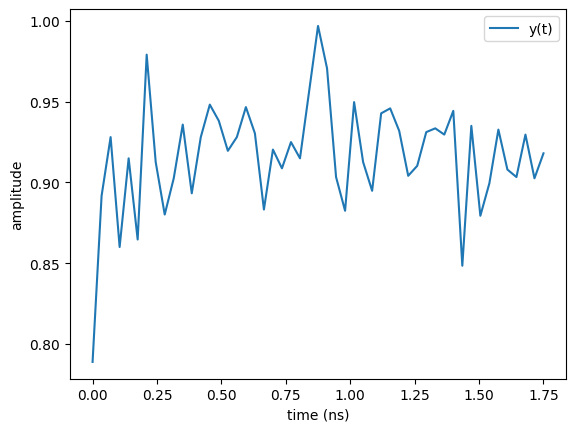

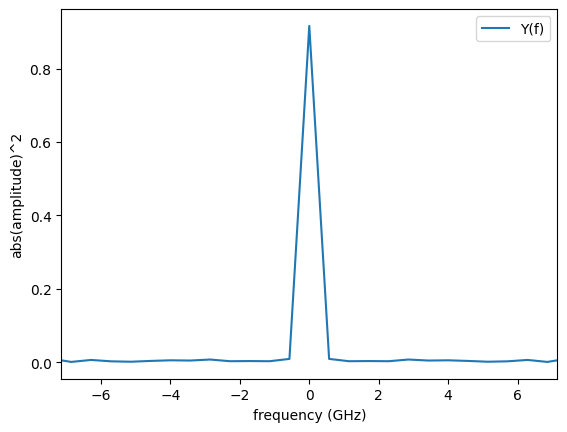

In [96]:
# take the FFT of our Ramsey curve
# bad data - no fringe

t_pts = t_data[0]
pts = len(t_pts)
y_pts = y_data[0]
Y_pts = fftshift(fft(y_pts))
dt = t_pts[1]-t_pts[0]
f_pts = linspace(-1/(2*dt),1/(2*dt),pts)

plt.plot(t_pts,y_pts,label='y(t)')
plt.legend()
plt.xlabel("time (ns)")
plt.ylabel("amplitude")
plt.show()

plt.plot(f_pts,abs(Y_pts)/pts,label='Y(f)')
plt.xlim((-max(f_pts)/2,max(f_pts)/2))
plt.legend()
plt.xlabel("frequency (GHz)")
plt.ylabel("abs(amplitude)^2")
plt.show()